<a href="https://colab.research.google.com/github/venuranga/EE7204---TakeHomeAssignment-II_EG_2019_3775/blob/main/TakeHomeAssignment_ii_EG_2019_3775.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EE7204 - Computer Vision and Image Processing -
EG/2019/3775
Weerawardhane W.A.S.V.

Take Home Assignment II

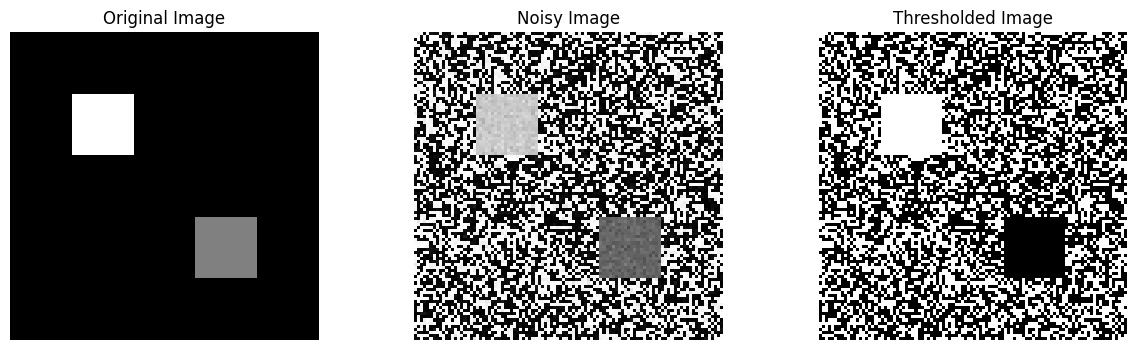

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to generate the synthetic image with 2 objects
def generate_image():
    image = np.zeros((100, 100), dtype=np.uint8)  # Create a black image
    obj1 = np.full((20, 20), 200, dtype=np.uint8)  # Object 1 with intensity 200
    obj2 = np.full((20, 20), 100, dtype=np.uint8)  # Object 2 with intensity 100
    image[20:40, 20:40] = obj1
    image[60:80, 60:80] = obj2
    return image

# Function to add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, stddev=10):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = image + noise
    return noisy_image

# Generate image
image = generate_image()

# Add Gaussian noise
noisy_image = add_gaussian_noise(image)


# Apply Otsu's algorithm (or use adaptive thresholding)
_, thresholded_image = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results in three columns
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')


plt.subplot(1, 4, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()


Saving 108073-6.jpg to 108073-6 (7).jpg


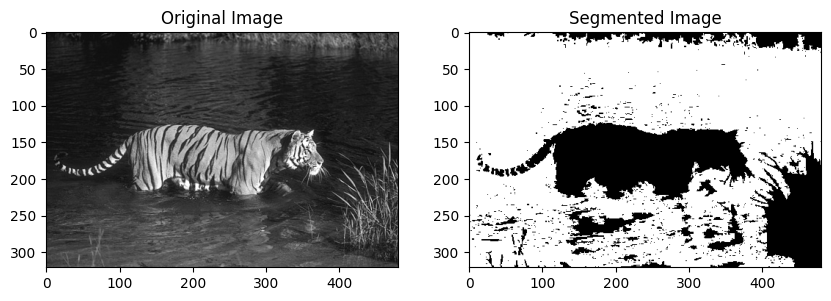

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(img, seed, threshold):
    region = np.zeros_like(img)
    region[seed] = 1
    neighbor_pixels = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 4-connectivity
    while len(seed) > 0:
        current_seed = seed.pop()
        for dx, dy in neighbor_pixels:
            x, y = current_seed[0] + dx, current_seed[1] + dy
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1] and region[x, y] == 0:
                if abs(int(img[x, y]) - int(img[current_seed])) <= threshold:
                    region[x, y] = 1
                    seed.append((x, y))
    return region

# Upload an image file
from google.colab import files
uploaded = files.upload()

# Read the uploaded image
file_name = next(iter(uploaded))
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Setting seed point and threshold for region growing
    seed_point = (50, 50)  # Example seed point, adjust as needed
    threshold = 7  # Example threshold value, adjust as needed

    # Applying region growing
    segmented_img = region_growing(img, [seed_point], threshold)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
    plt.show()
